In [183]:
import csv
import pandas as pd
import math
import numpy as np
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import random
from lmfit import Model

In [149]:
read=pd.read_csv("./Downloads/Gaussian Beam - Rajnil_Analysis_Copy_D=20.csv")
print(read)

    MSR  CSR   MSV    CSV     TR  Current 
0    13   15  0.65  0.015  0.665      23.4
1    13   30  0.65  0.030  0.680      23.7
2    13   46  0.65  0.046  0.696      23.3
3    14    8  0.70  0.008  0.708      23.0
4    15    0  0.75  0.000  0.750      21.5
5    16    0  0.80  0.000  0.800      20.6
6    17    5  0.85  0.005  0.855      19.0
7    17   31  0.85  0.031  0.881      18.3
8    18   12  0.90  0.012  0.912      17.6
9    18   35  0.90  0.035  0.935      17.4
10   22   47  1.10  0.047  1.055      15.5
11   21    5  1.05  0.005  1.147      14.3
12   23   10  1.15  0.010  1.160      13.6
13   24    3  1.20  0.003  1.203      12.5
14   25   10  1.25  0.010  1.260      12.2
15   26    3  1.30  0.003  1.303      11.1
16   27    8  1.35  0.008  1.358      10.1
17   27   47  1.35  0.047  1.397       9.3
18   28   25  1.40  0.025  1.425       9.4
19   29   20  1.45  0.020  1.470       8.2
20   30   10  1.50  0.010  1.510       7.8
21   30   20  1.50  0.020  1.520       5.9
22   32    

In [156]:
reading=[]
distance=[]

for i in read["TR"]:
    distance.append(i)
print(distance)

for i in read["Current "]:
    reading.append(i)
print(reading)

[0.665, 0.68, 0.696, 0.708, 0.75, 0.8, 0.855, 0.881, 0.912, 0.935, 1.055, 1.147, 1.16, 1.203, 1.26, 1.303, 1.358, 1.397, 1.425, 1.47, 1.51, 1.52, 1.605, 1.663, 1.721, 1.782, 1.822, 1.866]
[23.4, 23.7, 23.3, 23.0, 21.5, 20.6, 19.0, 18.3, 17.6, 17.4, 15.5, 14.3, 13.6, 12.5, 12.2, 11.1, 10.1, 9.3, 9.4, 8.2, 7.8, 5.9, 5.2, 5.2, 4.7, 3.3, 2.7, 2.6]


0.3218856103462079 1.019674875484228


/tmp/ipykernel_159390/1903202984.py:10: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return a*exp(-(x-x0)**2/(2*sigma**2))


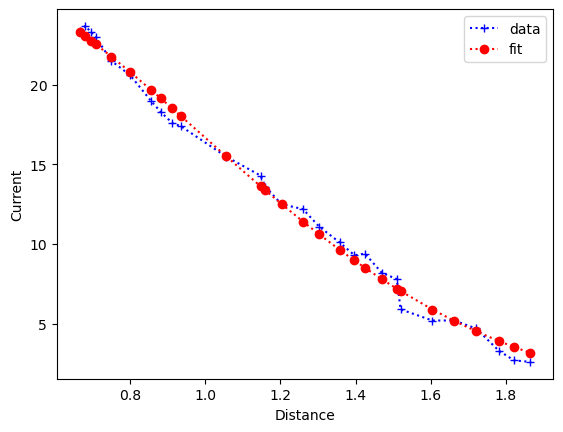

In [157]:
x = np.array(distance)
y =np.array(reading)

n = len(x)                          #the number of data
mean = sum(x * y) / sum(y)                  #note this correction
sigma=np.sqrt(sum(y * (x - mean)**2) / sum(y))  #note this correction
print(sigma,mean)

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Current')
plt.isinteractive
plt.show()

[-0.015 -0.03  -0.046 -0.058 -0.1   -0.15  -0.205 -0.231 -0.262 -0.285
 -0.405 -0.497 -0.51  -0.553 -0.61  -0.653 -0.708 -0.747 -0.775 -0.82
 -0.86  -0.87  -0.955 -1.013 -1.071 -1.132 -1.172 -1.216]
28
[-1.216 -1.172 -1.132 -1.071 -1.013 -0.955 -0.87  -0.86  -0.82  -0.775
 -0.747 -0.708 -0.653 -0.61  -0.553 -0.51  -0.497 -0.405 -0.285 -0.262
 -0.231 -0.205 -0.15  -0.1   -0.058 -0.046 -0.03  -0.015]
[ 2.6  2.7  3.3  4.7  5.2  5.2  5.9  7.8  8.2  9.3  9.4 10.1 11.1 12.2
 12.5 13.6 14.3 15.5 17.4 17.6 18.3 19.  20.6 21.5 23.  23.3 23.4 23.7
 23.4 23.7 23.3 23.  21.5 20.6 19.  18.3 17.6 17.4 15.5 14.3 13.6 12.5
 12.2 11.1 10.1  9.3  9.4  8.2  7.8  5.9  5.2  5.2  4.7  3.3  2.7  2.6]
0.4901669955123316 1.0099612617612168e-05


/tmp/ipykernel_159390/2976538471.py:19: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return a*exp(-(x-x0)**2/(2*sigma**2))


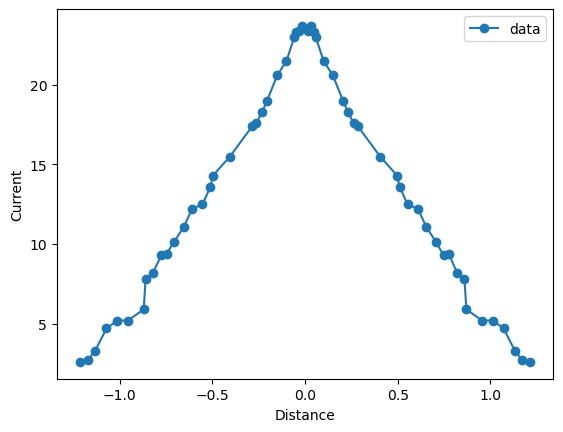

In [158]:
x_new_1=(x-(0.65))
x_new=x_new_1*(-1)
print(x_new)
print(len(x_new_1))
x_new=np.sort(x_new)
reading_sorted=np.sort(reading)
print(x_new)
reading_1=np.append(reading_sorted,reading)
print(reading_1)
x=np.append(x_new,x_new_1)
y =np.array(reading_1)

n = len(x)                          #the number of data
mean = sum(x * y) / sum(y)                  #note this correction
sigma=np.sqrt(sum(y * (x - mean)**2) / sum(y))  #note this correction
print(sigma,mean)

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])

plt.plot(x,y,'o-',label='data')
#plt.plot(x,gaus(x,*popt),label='fit')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Current')
plt.isinteractive
plt.show()

In [154]:

reading_1=np.append(reading,reading)
x=np.append(x_new,x_new_1)
y =np.array(reading_1)

n = len(x)                          #the number of data
mean = sum(x * y) / sum(y)                  #note this correction
sigma=np.sqrt(sum(y * (x - mean)**2) / sum(y))  #note this correction
print(sigma,mean)

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])

plt.plot(x,y,'o-',label='data')
#plt.plot(x,gaus(x,*popt),label='fit')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Current')
plt.isinteractive
plt.show()

0.6565163634054415 -0.19972606530160472


/tmp/ipykernel_159390/3754742584.py:11: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return a*exp(-(x-x0)**2/(2*sigma**2))


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

[-1.19 -1.14 -1.1  -1.03 -0.99 -0.92 -0.84 -0.83 -0.78 -0.75 -0.73 -0.71
 -0.63 -0.57 -0.51 -0.47 -0.47 -0.36 -0.28 -0.23 -0.21 -0.19 -0.13 -0.06
 -0.03 -0.02 -0.02  0.03  0.02  0.03  0.05  0.06  0.1   0.15  0.2   0.23
  0.26  0.29  0.4   0.5   0.51  0.55  0.61  0.65  0.71  0.75  0.78  0.82
  0.86  0.87  0.96  1.01  1.07  1.13  1.17  1.22]
[ 3.61  2.89  4.42  5.05  5.83  6.31  6.48  8.46  8.97  9.98  9.51 11.03
 12.4  13.21 12.62 14.41 14.9  16.35 17.52 18.33 19.11 19.93 21.53 21.73
 23.92 24.06 24.41 23.96 24.23 24.83 23.36 23.19 22.63 21.37 19.99 18.61
 17.63 18.03 16.37 14.48 14.37 12.66 12.46 12.09 10.16 10.55  9.82  9.
  8.14  6.23  6.43  6.38  5.5   3.87  3.94  2.73]
0.4920082808414473 0.013033764046422256


/tmp/ipykernel_159390/692741769.py:25: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return a*exp(-(x_1-x0)**2/(2*sigma**2))


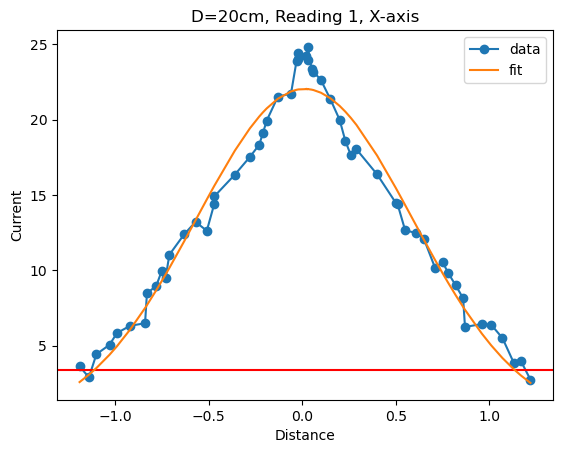

3.35205
22.041683572143366 0.011933076707321043 0.5798464201465695
[[ 8.61755802e-02  1.52682771e-07 -1.61039680e-03]
 [ 1.52682771e-07  1.10579642e-04  2.13566019e-08]
 [-1.61039680e-03  2.13566019e-08  1.08645829e-04]]


In [197]:
def rand_func(n,u):
    rand=np.zeros((56))
    for i in range (0,n):
        rand[i]=random.uniform(0.0,u)
    return np.array(rand)

x_1=x+rand_func(28,0.05)
y_1=reading_1+rand_func(56,1.3)

x_1=np.round(x_1,2)
y_1=np.round(y_1,2)

print(x_1)
print(y_1)

lower_bounds = [0, -np.inf, 0]  # Lower bounds: [a, x0, sigma]
upper_bounds = [np.inf, np.inf, np.inf]  # Upper bounds

n = len(x_1)                          #the number of data
mean = sum(x_1 * y_1) / sum(y_1)                  #note this correction
sigma=np.sqrt(sum(y_1 * (x_1 - mean)**2) / sum(y_1))  #note this correction
print(sigma,mean)

def gaus(x_1,a,x0,sigma):
    return a*exp(-(x_1-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x_1,y_1,p0=[25,mean,sigma],bounds=(lower_bounds, upper_bounds))

# def file_reader():
#     try:
#         file=open("./Documents/Gaussian_Reading__1_x_D_20.txt","x")
#     except:
#         print("Error")
#     file.write(x_1,y_1)
#     file.flush()
#     file.close()

plt.plot(x_1,y_1,'o-',label='data')
plt.axhline(y=np.max(y_1)*0.135, color = 'r', linestyle = '-')
plt.plot(x_1,gaus(x_1,*popt),label='fit')
plt.title("D=20cm, Reading 1, X-axis")
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Current')
plt.isinteractive
plt.show()

print(np.max(y_1)*0.135)
print(*popt)
print(pcov)


In [199]:
# Number of bootstrap iterations
n_bootstrap = 1000

# Initialize arrays to store bootstrapped parameter values
bootstrapped_means = []
bootstrapped_sigmas = []

# Perform bootstrap resampling
for _ in range(n_bootstrap):
    # Generate random indices for resampling with replacement
    indices = np.random.randint(0, len(x_1), len(x_1))
    x_bootstrap = x_1[indices]
    y_bootstrap = y_1[indices]
    
    # Fit the Gaussian model to the bootstrapped data
    popt_bootstrap, _ = curve_fit(gaus, x_bootstrap, y_bootstrap, p0=[25, np.mean(x_bootstrap), np.std(x_bootstrap)])
    
    # Store the bootstrapped parameter values
    bootstrapped_means.append(popt_bootstrap[1])
    bootstrapped_sigmas.append(popt_bootstrap[2])

# Calculate the standard deviation of the bootstrapped parameter distributions
mean_error = np.std(bootstrapped_means)
sigma_error = np.std(bootstrapped_sigmas)

print("Error in mean:", mean_error)
print("Error in standard deviation:", sigma_error)

/tmp/ipykernel_159390/692741769.py:25: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return a*exp(-(x_1-x0)**2/(2*sigma**2))


Error in mean: 0.00885491357077518
Error in standard deviation: 0.009193137163543677
